#Perceptron

##->Perceptron is a single layer neural network
##->it acts as linear classifier ,Binary classifier
##->Loss function : Binary Cross Entropy (-ve log likehood)
##->Optimisation :Gradient Descent stochastic



In [98]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs ,make_moons

Generating data


In [5]:
x,y=make_blobs(n_samples=500,centers=2,n_features=2,cluster_std=1.0,shuffle=None)

In [7]:
print(x.shape,y.shape)

(500, 2) (500,)


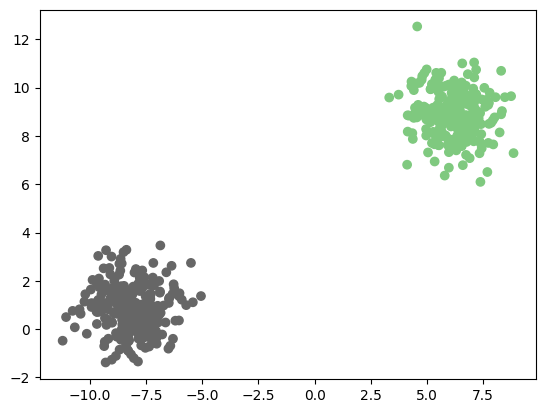

In [9]:
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.Accent)

Model and helper funcitions

In [10]:
def sigmoid(z):
  return (1.0)/(1+np.exp(-z))

implement perceptron learning algorithm

In [13]:
# ->lean the weights
# ->reduce the loss
# ->make the prediciton

In [40]:
def predict(x,weights):
  """x->mx(n-1)matrix ,w-> (nx1,)vector"""
  z=np.dot(x,weights)
  predictions=sigmoid(z)
  return predictions

def loss(x,y,weights):
  """Binary cross entropy"""
  y_=predict(x,weights)
  cost =np.mean(-y*np.log(y_)-(1-y)*np.log(1-y_))
  return cost

def update(x,y,weights,learning_rate):
  """preform weights updates for 1 epoch """
  y_=predict(x,weights)
  dw=np.dot(x.T,y_-y)
  m=x.shape[0]
  weights=weights-learning_rate*dw/(float(m))
  return weights
def train(x,y,learning_rate=0.5,maxEpochs=100):
  #modify the input to handle the bais term
  ones=np.ones((x.shape[0],1))
  x=np.hstack((ones,x))
  #init weights 0
  weights=np.zeros(x.shape[1])#n+1 entires
  #Iterate over all epoches and make updates
  for epoch in range (maxEpochs):
    weights =update(x,y,weights,learning_rate)
    if epoch%10==0:
      l=loss(x,y,weights)
      # print("Epoch % loss %.10f "% (epoch ,l))
  return weights

In [64]:
weights=train(x,y,0.5,10000)
print(weights)

Epoch  0ss 0.0000070249 
Epoch  12ss 0.0000070146 
Epoch  24ss 0.0000070043 
Epoch  36ss 0.0000069941 
Epoch  50ss 0.0000069839 
Epoch  62ss 0.0000069737 
Epoch  74ss 0.0000069636 
Epoch  106ss 0.0000069535 
Epoch  120ss 0.0000069434 
Epoch  132ss 0.0000069333 
Epoch  144ss 0.0000069233 
Epoch  156ss 0.0000069133 
Epoch  170ss 0.0000069034 
Epoch  202ss 0.0000068934 
Epoch  214ss 0.0000068835 
Epoch  226ss 0.0000068737 
Epoch  240ss 0.0000068638 
Epoch  252ss 0.0000068540 
Epoch  264ss 0.0000068442 
Epoch  276ss 0.0000068344 
Epoch  310ss 0.0000068247 
Epoch  322ss 0.0000068150 
Epoch  334ss 0.0000068053 
Epoch  346ss 0.0000067957 
Epoch  360ss 0.0000067861 
Epoch  372ss 0.0000067765 
Epoch  404ss 0.0000067669 
Epoch  416ss 0.0000067574 
Epoch  430ss 0.0000067478 
Epoch  442ss 0.0000067384 
Epoch  454ss 0.0000067289 
Epoch  466ss 0.0000067195 
Epoch  500ss 0.0000067101 
Epoch  512ss 0.0000067007 
Epoch  524ss 0.0000066914 
Epoch  536ss 0.0000066820 
Epoch  550ss 0.0000066727 
Epoch  56

Perceptron Implementation -Part -||

In [65]:
# ->make prediciton
# ->visualizing the decision surface
# ->Liner vs Non-linear classification

In [90]:
def getPredictions(x_test,weights,labels=True):
  if x_test.shape[1] !=weights.shape[0]:
    ones=np.ones((x_test.shape[0],1))
    x_test=np.hstack((ones,x_test))
  probs=predict(x_test,weights)
  if not labels:
    return probs
  else:
    labels =np.zeros(probs.shape)
    labels[probs>=0.5]=1
    return labels

In [91]:
x1=np.linspace(-8,2,10)
x2=-(weights[0]+weights[1]*x1)/weights[2]
print(x1,x2)

[-8.         -6.88888889 -5.77777778 -4.66666667 -3.55555556 -2.44444444
 -1.33333333 -0.22222222  0.88888889  2.        ] [15.84153881 13.64443282 11.44732684  9.25022086  7.05311487  4.85600889
  2.65890291  0.46179692 -1.73530906 -3.93241504]


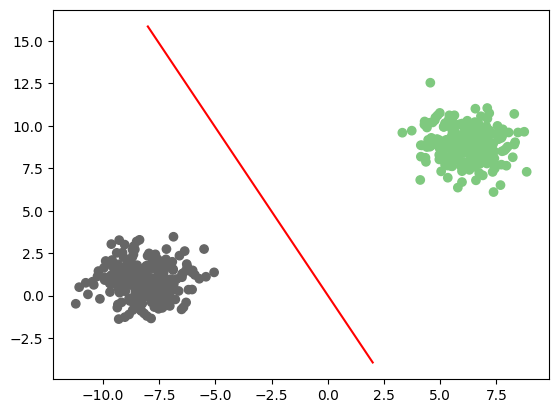

In [92]:
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.Accent)
plt.plot(x1,x2,c='red')
plt.show()


In [93]:

y_pred=getPredictions(x,weights,labels=True)
print(y_pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [94]:
training_acc=np.sum(y_pred==y)/y.shape[0]
print(training_acc)

1.0


In [106]:
# suppose if the data is non-linear
x,y=make_moons(n_samples=500,shuffle=True,noise=0.2,random_state=1)

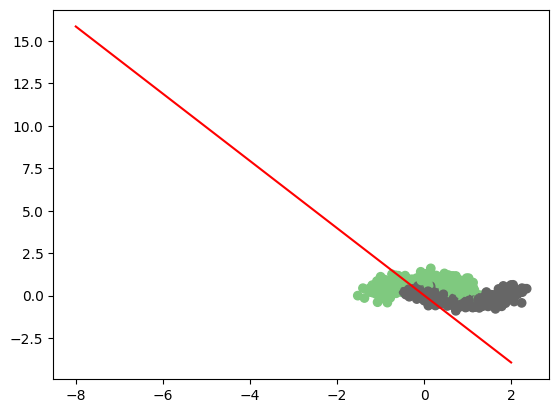

accurcy is  0.484


In [109]:
#Non-linear data (this model is not able to classify the non-linear data so we use multipal Perceptron
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.Accent)
plt.plot(x1,x2,c='red')
plt.show()
training_acc=np.sum(y_pred==y)/y.shape[0]
print("accurcy is ",training_acc)